In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("Downloads/Agent5Data.csv")
df

,AGENT,ITERATION,NO OF GHOSTS,RESULT,TIME
0,A5,1,1,True,0.027545
1,A5,2,1,True,0.025516
2,A5,3,1,True,0.028986
3,A5,4,1,True,0.026275
4,A5,5,1,True,0.033026
...,...,...,...,...,...
3745,A5,26,125,False,0.512895
3746,A5,27,125,False,0.329388
3747,A5,28,125,False,0.019285
3748,A5,29,125,False,0.276998


In [3]:
Agent = df['AGENT'].iat[0]
Agent

'A5'

In [4]:
DF=df["NO OF GHOSTS"].value_counts().to_frame().sort_index()
DF = DF.rename({'NO OF GHOSTS':'COUNT'}, axis=1)
DF.reset_index(inplace=True)
DF = DF.rename(columns = {'index':'NO OF GHOSTS'})
DF

,NO OF GHOSTS,COUNT
0,1,30
1,2,30
2,3,30
3,4,30
4,5,30
...,...,...
120,121,30
121,122,30
122,123,30
123,124,30


In [5]:
DF.columns

Index(['NO OF GHOSTS', 'COUNT'], dtype='object')

In [6]:
DF1 = pd.merge(df,DF,on ='NO OF GHOSTS',how ='left')
DF1

,AGENT,ITERATION,NO OF GHOSTS,RESULT,TIME,COUNT
0,A5,1,1,True,0.027545,30
1,A5,2,1,True,0.025516,30
2,A5,3,1,True,0.028986,30
3,A5,4,1,True,0.026275,30
4,A5,5,1,True,0.033026,30
...,...,...,...,...,...,...
3745,A5,26,125,False,0.512895,30
3746,A5,27,125,False,0.329388,30
3747,A5,28,125,False,0.019285,30
3748,A5,29,125,False,0.276998,30


In [7]:
NOFT= df.groupby(["NO OF GHOSTS", "RESULT"]).size().to_frame()
NOFT

0
NO OF GHOSTS RESULT    
1            False    3
             True    27
2            False    3
             True    27
3            False    3
...                  ..
122          False   30
123          False   30
124          False   29
             True     1
125          False   30

[225 rows x 1 columns]

In [8]:
NOFT.reset_index(inplace=True)
NOFT = NOFT.rename({0:'SUCCESSCOUNT'}, axis=1)
NOFT

,NO OF GHOSTS,RESULT,SUCCESSCOUNT
0,1,False,3
1,1,True,27
2,2,False,3
3,2,True,27
4,3,False,3
...,...,...,...
220,122,False,30
221,123,False,30
222,124,False,29
223,124,True,1


In [9]:
FinalDf=pd.merge(NOFT, 
                      DF, 
                      on =['NO OF GHOSTS'], 
                      how ='left')
FinalDf

,NO OF GHOSTS,RESULT,SUCCESSCOUNT,COUNT
0,1,False,3,30
1,1,True,27,30
2,2,False,3,30
3,2,True,27,30
4,3,False,3,30
...,...,...,...,...
220,122,False,30,30
221,123,False,30,30
222,124,False,29,30
223,124,True,1,30


In [10]:
FinalDf["Surv"]=FinalDf["SUCCESSCOUNT"]/FinalDf["COUNT"]
FinalDf

,NO OF GHOSTS,RESULT,SUCCESSCOUNT,COUNT,Surv
0,1,False,3,30,0.100000
1,1,True,27,30,0.900000
2,2,False,3,30,0.100000
3,2,True,27,30,0.900000
4,3,False,3,30,0.100000
...,...,...,...,...,...
220,122,False,30,30,1.000000
221,123,False,30,30,1.000000
222,124,False,29,30,0.966667
223,124,True,1,30,0.033333


In [11]:
FinalDf=FinalDf.query('RESULT != False')
FinalDf

,NO OF GHOSTS,RESULT,SUCCESSCOUNT,COUNT,Surv
1,1,True,27,30,0.900000
3,2,True,27,30,0.900000
5,3,True,27,30,0.900000
7,4,True,28,30,0.933333
9,5,True,27,30,0.900000
...,...,...,...,...,...
206,111,True,1,30,0.033333
208,112,True,1,30,0.033333
211,114,True,1,30,0.033333
215,117,True,1,30,0.033333


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

(0.0, 1.0)

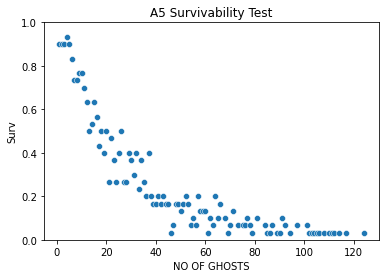

In [13]:
graph=sns.scatterplot(x="NO OF GHOSTS", y="Surv", data=FinalDf).set(title=Agent+" Survivability Test")
plt.ylim(0, 1)

In [14]:
Timedf=df.groupby(["NO OF GHOSTS","RESULT"], as_index=False)['TIME'].mean()
Timedf=Timedf.query('RESULT != False')
Timedf

,NO OF GHOSTS,RESULT,TIME
1,1,True,0.028224
3,2,True,0.033374
5,3,True,0.036868
7,4,True,0.036494
9,5,True,0.038956
...,...,...,...
206,111,True,0.936219
208,112,True,1.012374
211,114,True,1.076702
215,117,True,1.013464


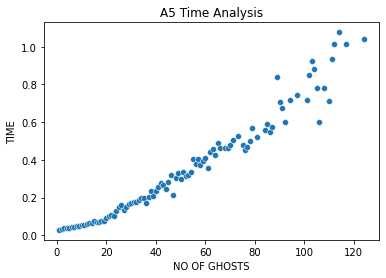

In [15]:
graphtime=sns.scatterplot(x="NO OF GHOSTS", y="TIME", data=Timedf).set(title=Agent+" Time Analysis")